In [1]:
# 这个ipython notebook主要是我解决Kaggle Titanic问题的思路和过程

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

titanic = pd.read_csv("/Users/yumh/project/kaggle/kaggle_titanic/Train.csv")
titanic.columns
#titanic[titanic.Cabin.notnull()]['Survived'].value_counts()


Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [2]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()
#我们发现有一些列，比如说Cabin，有非常多的缺失值
#另外一些我们感觉在此场景中会有影响的属性，比如Age，也有一些缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 缺失值填充
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#查看 Sex属性有多少种值
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [9]:
titanic.loc[titanic["Sex"]=="male","Sex"] =0
titanic.loc[titanic["Sex"]=="female","Sex"] =1


In [10]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#查看 登船地点 Embarked 属性有多少种
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
titanic["Embarked"]=titanic["Embarked"].fillna("S")
titanic.loc[titanic["Embarked"]=="S","Embarked"] =0
titanic.loc[titanic["Embarked"]=="C","Embarked"] =1
titanic.loc[titanic["Embarked"]=="Q","Embarked"] =2

In [13]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### 分类算法 线性回归

In [14]:
from sklearn.linear_model import LinearRegression  #分类算法 线性回归
from sklearn.cross_validation import KFold   #交叉验证库，将测试集进行切分验证取平均值

# 实例化模型

predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]   #用到的特征
alg = LinearRegression() #线性回归模型实例化对象
kf = KFold(titanic.shape[0],n_folds=3,random_state=1) #将m个平均分成3份进行交叉验证
    

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 把数据传入模型 预测结果

In [15]:
predictions = []
#for循环： 训练集、测试集、交叉验证
for train, test in kf:
   #print train
   #print test
   train_predictors = (titanic[predictors].iloc[train,:]) #将predictors作为测试特征
   #print train_predictors
   train_target = titanic["Survived"].iloc[train]
   #print train_target
   alg.fit(train_predictors,train_target)  #构建线性模型 样本的x（训练数据） 样本的y（标签值）
   test_prediction = alg.predict(titanic[predictors].iloc[test,:]) #预测结果值
   predictions.append(test_prediction)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [16]:
###算法概率计算
import numpy as np
#使用线性回归得到的结果是在区间【0，1】上的某个值，需要将该值转换成0或1
predictions = np.concatenate(predictions, axis=0)
predictions[predictions >.5] = 1
predictions[predictions <=.5] = 0
accury = sum(predictions[predictions == titanic['Survived']]) / len(predictions) #测试准确率 进行模型评估
print accury #精度值

0.2615039281705948


### 集成算法 构造多个分类树

In [17]:
#构造多个分类器
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn import cross_validation
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors],titanic["Survived"],cv=3)
print scores.mean()

0.7878787878787877


### 随机森林

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
predictions = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# Initialize our algorithm with the default paramters
# random_state = 1 表示此处代码多运行几次得到的随机值都是一样的，如果不设置，两次执行的随机值是不一样的
# n_estimators  指定有多少颗决策树，树的分裂的条件是:
# min_samples_split 代表样本不停的分裂，某一个节点上的样本如果只有2个了 ，就不再继续分裂了
# min_samples_leaf 是控制叶子节点的最小个数
alg = RandomForestClassifier(random_state=1,n_estimators=100,min_samples_split=4,min_samples_leaf=2)
#进行交叉验证
kf = cross_validation.KFold(titanic.shape[0],n_folds=3,random_state=1)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)
print scores.mean()


0.8148148148148148


### 特征提取

In [19]:
# ## 关于特征提取问题 (非常关键)
# - 尽可能多的提取特征
# - 看不同特征的效果
# - 特征提取是数据挖掘里很- 要的一部分
# - 以上使用的特征都是数据里已经有的了，在真实的数据挖掘里我们常常没有合适的特征，需要我们自己取提取
# ① 把多个特征组合成一个特征
titanic['Familysize'] = titanic['SibSp'] + titanic['Parch'] #家庭总共多少人
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x)) #名字的长度

import re
def get_title(name):
    title_reserch = re.search('([A-Za-z]+)\.',name)
    if title_reserch:
        return title_reserch.group(1)
    return ""
titles = titanic['Name'].apply(get_title)
#print pandas.value_counts(titles)

#将称号转换成数值表示
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Dr":5,"Rev":6,"Col":7,"Major":8,"Mlle":9,"Countess":10,"Ms":11,"Lady":12,"Jonkheer":13,"Don":14,"Mme":15,"Capt":16,"Sir":17}
for k,v in title_mapping.items():
    titles[titles==k] = v
    #print (pandas.value_counts(titles))
titanic["titles"] = titles #添加title特征

### 进行特征选择

In [21]:
# 进行特征选择
# 特征重要性分析
# 分析 不同特征对 最终结果的影响
# 例如 衡量age列的重要程度时，什么也不干，得到一个错误率error1，
# 加入一些噪音数据，替换原来的值(注意，此时其他列的数据不变)，又得到一个一个错误率error2
# 两个错误率的差值 可以体现这一个特征的重要性
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif#引入feature_selection看每一个特征的重要程度
import matplotlib.pyplot as plt
 
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Familysize','NameLength','titles']
selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])
scores = -np.log10(selector.pvalues_)

### 用视图的方式展示

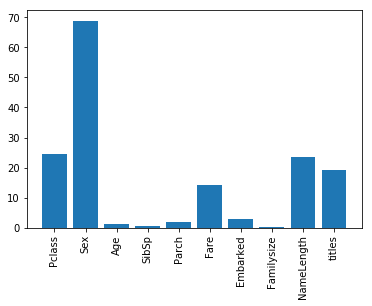

In [22]:
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

#### 集成分类器

In [23]:
# 在竞赛中常用的耍赖的办法:集成多种算法，取最后每种算法的平均值，来减少过拟合
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
# GradientBoostingClassifier也是一种随机森林的算法，可以集成多个弱分类器，然后变成强分类器
algorithas = [
         [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Familysize','NameLength','titles']],
         [LogisticRegression(random_state=1),['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Familysize','NameLength','titles']]
        ]
kf = KFold(titanic.shape[0],n_folds=3,random_state=1)
predictions = []
for train, test in kf:
   train_target = titanic['Survived'].iloc[train]
   full_test_predictions = []
   for alg,predictors in algorithas:
        alg.fit(titanic[predictors].iloc[train,:],train_target)
        test_prediction = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_prediction)
   test_predictions = (full_test_predictions[0] + full_test_predictions[1])/2
   test_predictions[test_predictions >.5] = 1
   test_predictions[test_predictions <=.5] = 0
   predictions.append(test_predictions)
predictions = np.concatenate(predictions,axis=0)
accury = sum(predictions[predictions == titanic['Survived']]) / len(predictions)#测试准确率
print accury

0.27946127946127947
